# question 1 Linear Regression

In [2]:
# import moduls 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error,mean_squared_error
from sklearn.preprocessing import StandardScaler

In [3]:
# create artifical dataset

# number of sample
N = 1000
np.random.seed(42)
# x in range 0 to 2 * pi
x = (np.linspace(0,2 * np.pi, N))

# x1 is equal to x**3 
x1 = x**3

# x2 is equal to sin(x)
x2 = np.sin(x)

# create noise 
mean = 1
scale = np.sqrt(0.2)
noise = np.random.normal(loc=mean,scale=scale,size=N)

# y created by this (2 - x1 + 3 * x2 + noise)
y = 2 - x1 + 3 * x2 + noise


#craete a dataframe of our features and y 
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
display(df.head())



,x1,x2,y
0,0.000000e+00,0.000000,3.222137
1,2.487959e-07,0.006289,2.957034
2,1.990367e-06,0.012579,3.327389
3,6.717488e-06,0.018867,3.737715
4,1.592293e-05,0.025155,2.970733


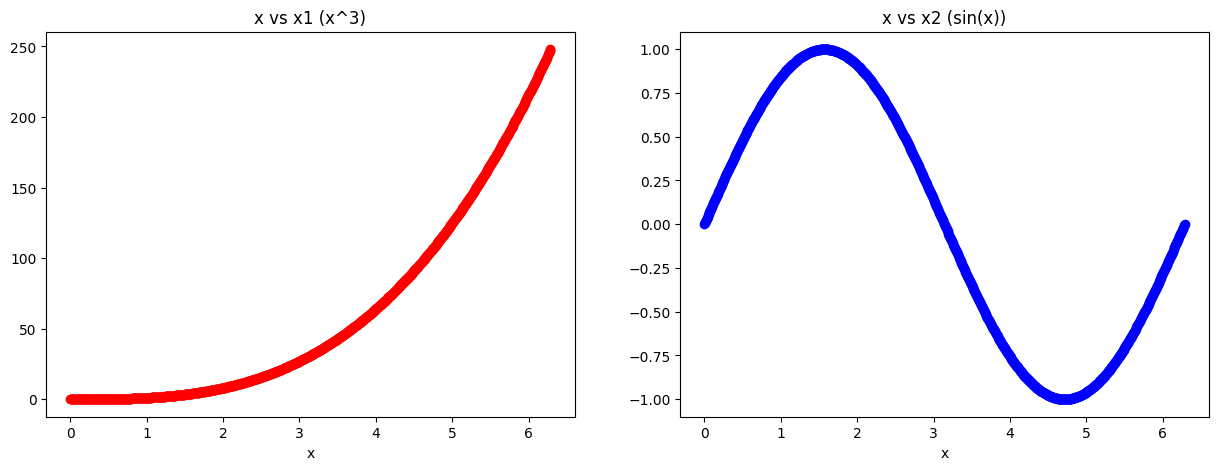

In [59]:
# plot the relation between x and faetures 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x=x,y='x1',c='red',label = 'x1 vs x',data=df)
plt.title('x vs x1 (x^3)')
plt.xlabel('x')
plt.subplot(1,2,2)
plt.scatter(x=x,y='x2',c='blue',label = 'x2 vs x',data=df)
plt.xlabel('x')
plt.title('x vs x2 (sin(x))')
plt.show()

 دارای همبستگی غیر خطی با اکس (x1)

دارای رفتار سینوسی  و همبستگی از نوع  پیچیده تری داره  (x2)

In [60]:
# train and test 
Xtrain, Xtest, ytrain, ytest = train_test_split(df[['x2']],df['y'],test_size=0.3,random_state=42)

In [61]:
# fit linear regression and LS on not scaled data

linear_regression = LinearRegression(fit_intercept=False)
linear_regression.fit(Xtrain,ytrain)

# model doesn't fit intercept by itself
print("model intercept",linear_regression.intercept_)
# extract coefficients
w = linear_regression.coef_[0]
print("model coefficient",w)

bias = 2

# predict
y_pred_test = w * Xtest.values + bias
y_pred_train = w * Xtrain.values + bias


# Least Squares Regression

Xtrain_mat = Xtrain
ytrain_mat = ytrain.values.reshape(-1,1)

Xtrain_aug = np.hstack([np.ones((Xtrain_mat.shape[0],1)), Xtrain_mat])
theta_ls = np.linalg.inv(Xtrain_aug.T @ Xtrain_aug) @ (Xtrain_aug.T @ ytrain_mat)

print("theta LS:", theta_ls.ravel())


Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest])
y_pred_train_ls = Xtrain_aug @ theta_ls
y_pred_test_ls = Xtest_aug @ theta_ls


model intercept 0.0
model coefficient 70.66744391915489
theta LS: [-58.05922881  69.57933069]


In [62]:
# RMSE , NDEI , MSE NO SCALING
# for train data at first
RMSE = root_mean_squared_error(ytrain,y_pred_train)
MSE = mean_squared_error(ytrain,y_pred_train)
NDEI = RMSE/np.std(ytrain)
# all metrics for LS 
RMSE_LS = root_mean_squared_error(ytrain,y_pred_train_ls)
MSE_LS = mean_squared_error(ytrain,y_pred_train_ls)
NDEI_LS = RMSE/np.std(ytrain)

print(f"RMSE:{RMSE}\nMSE:{MSE}\nNDEI:{NDEI}\n\n")
print(f"RMSE ls:{RMSE_LS}\nMSE ls:{MSE_LS}\nNDEI ls:{NDEI_LS}\n\n")

# for test data at second
RMSE_TEST = root_mean_squared_error(ytest,y_pred_test)
MSE_TEST = mean_squared_error(ytest,y_pred_test)
NDEI_TEST = RMSE_TEST/np.std(ytest)
# all metrics for LS  ot test data
RMSE_TEST_LS = root_mean_squared_error(ytest,y_pred_test_ls)
MSE_TEST_LS = mean_squared_error(ytest,y_pred_test_ls)
NDEI_TEST_LS = RMSE_TEST_LS/np.std(ytest)

print(f"RMSE_TEST:{RMSE_TEST}\nMSE_TEST:{MSE_TEST}\nNDEI_TEST:{NDEI_TEST}\n\n")
print(f"RMSE_TEST LS:{RMSE_TEST_LS}\nMSE_TEST LS:{MSE_TEST_LS}\nNDEI_TEST LS:{NDEI_TEST_LS}")




RMSE:78.72523143242698
MSE:6197.662064089189
NDEI:1.1108560798697178


RMSE ls:50.9037008313381
MSE ls:2591.186758326371
NDEI ls:1.1108560798697178


RMSE_TEST:83.83084596139697
MSE_TEST:7027.610734603467
NDEI_TEST:1.1318897057595874


RMSE_TEST LS:54.91173127060951
MSE_TEST LS:3015.298231135634
NDEI_TEST LS:0.7414218792359659


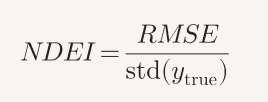

In [63]:
# fit model ond scaled datas and calculate RMSE , MSE , NDEI  metrics
scaler = StandardScaler()

Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

linear_regression_scaled = LinearRegression(fit_intercept=False)
linear_regression_scaled.fit(Xtrain,ytrain)

# model doesn't fit intercept by itself
print("model intercept",linear_regression_scaled.intercept_)
# extract coefficients
w = linear_regression_scaled.coef_[0]
print("model coefficient",w)

bias = 2

# predict
y_pred_test_scaled = w * Xtest + bias
y_pred_train_scaled = w * Xtrain + bias



# Least Squares Regression
Xtrain_mat = Xtrain
ytrain_mat = ytrain.values.reshape(-1,1)

Xtrain_aug = np.hstack([np.ones((Xtrain_mat.shape[0],1)), Xtrain_mat])
theta_ls = np.linalg.inv(Xtrain_aug.T @ Xtrain_aug) @ (Xtrain_aug.T @ ytrain_mat)

print("theta LS:", theta_ls.ravel())

# prediction with theta
Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest])
y_pred_train_ls = Xtrain_aug @ theta_ls
y_pred_test_ls = Xtest_aug @ theta_ls




model intercept 0.0
model coefficient 49.30745195541855
theta LS: [-58.71420321  49.30745196]


In [64]:
# MSE , RMSE , NDEI  on scaled datas 
# for train data at first
RMSE = root_mean_squared_error(ytrain,y_pred_train_scaled)
MSE = mean_squared_error(ytrain,y_pred_train_scaled)
NDEI = RMSE/np.std(ytrain)

RMSE_LS = root_mean_squared_error(ytrain,y_pred_train_ls)
MSE_LS = mean_squared_error(ytrain,y_pred_train_ls)
NDEI_LS = RMSE/np.std(ytrain)

print(f"RMSE:{RMSE}\nMSE:{MSE}\nNDEI:{NDEI}\n\n")
print(f"RMSE ls:{RMSE_LS}\nMSE ls:{MSE_LS}\nNDEI ls:{NDEI_LS}\n\n")

# for test data at second
RMSE_TEST = root_mean_squared_error(ytest,y_pred_test_scaled)
MSE_TEST = mean_squared_error(ytest,y_pred_test_scaled)
NDEI_TEST = RMSE_TEST/np.std(ytest)

RMSE_TEST_LS = root_mean_squared_error(ytest,y_pred_test_ls)
MSE_TEST_LS = mean_squared_error(ytest,y_pred_test_ls)
NDEI_TEST_LS = RMSE_TEST_LS/np.std(ytest)
print(f"RMSE_TEST:{RMSE_TEST}\nMSE_TEST:{MSE_TEST}\nNDEI_TEST:{NDEI_TEST}\n\n")
print(f"RMSE_TEST LS:{RMSE_TEST}\nMSE_TEST LS:{MSE_TEST}\nNDEI_TEST LS:{NDEI_TEST}")


RMSE:79.2300525665725
MSE:6277.401229701841
NDEI:1.1179793822202941


RMSE ls:50.9037008313381
MSE ls:2591.186758326371
NDEI ls:1.1179793822202941


RMSE_TEST:84.31493142819672
MSE_TEST:7109.007661741515
NDEI_TEST:1.138425860206016


RMSE_TEST LS:84.31493142819672
MSE_TEST LS:7109.007661741515
NDEI_TEST LS:1.138425860206016


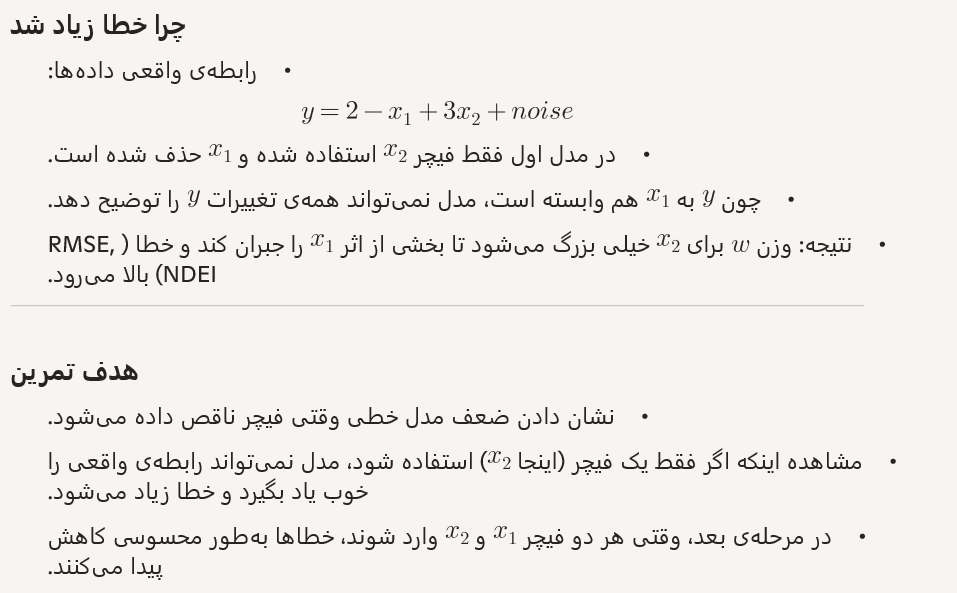

# part B 

In [65]:
# with out bias linear regression and theta 
display(df.head())

Xtrain , Xtest , ytrain , ytest = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.3,random_state=42)

,x1,x2,y
0,0.000000e+00,0.000000,3.222137
1,2.487959e-07,0.006289,2.957034
2,1.990367e-06,0.012579,3.327389
3,6.717488e-06,0.018867,3.737715
4,1.592293e-05,0.025155,2.970733


In [66]:
linear_regression = LinearRegression(fit_intercept=False)

linear_regression.fit(Xtrain,ytrain)

# prediction for test and train
train_predict = linear_regression.predict(Xtrain)
test_predict = linear_regression.predict(Xtest)


# fit theta and predict with it 
Xtrain_mat = Xtrain.values   
ytrain_mat = ytrain.values

theta_ls_no_bias = np.linalg.pinv(Xtrain_mat) @ ytrain_mat


train_predict_ls = Xtrain_mat @ theta_ls_no_bias
test_predict_ls = Xtest.values @ theta_ls_no_bias


In [67]:
# Train - ScikitLearn
MSE = mean_squared_error(ytrain, train_predict)
RMSE = np.sqrt(MSE)
NDEI = RMSE / np.std(ytrain)

# Train - LS
MSE_LS = mean_squared_error(ytrain, train_predict_ls)
RMSE_LS = np.sqrt(MSE_LS)
NDEI_LS = RMSE_LS / np.std(ytrain)

# Test - ScikitLearn
MSE_TEST = mean_squared_error(ytest, test_predict)
RMSE_TEST = np.sqrt(MSE_TEST)
NDEI_TEST = RMSE_TEST / np.std(ytest)

# Test - LS
MSE_LS_TEST = mean_squared_error(ytest, test_predict_ls)
RMSE_LS_TEST = np.sqrt(MSE_LS_TEST)
NDEI_LS_TEST = RMSE_LS_TEST / np.std(ytest)

# Train - LinReg
print(f"RMSE_TRAIN:{RMSE}\nMSE_TRAIN:{MSE}\nNDEI_TRAIN:{NDEI}\n")

# Train - LS
print(f"RMSE_TRAIN LS:{RMSE_LS}\nMSE_TRAIN LS:{MSE_LS}\nNDEI_TRAIN LS:{NDEI_LS}\n")

# Test - LinReg
print(f"RMSE_TEST:{RMSE_TEST}\nMSE_TEST:{MSE_TEST}\nNDEI_TEST:{NDEI_TEST}\n")

# Test - LS
print(f"RMSE_TEST LS:{RMSE_LS_TEST}\nMSE_TEST LS:{MSE_LS_TEST}\nNDEI_TEST LS:{NDEI_LS_TEST}")

RMSE_TRAIN:1.9500263911211888
MSE_TRAIN:3.802602926069128
NDEI_TRAIN:0.027515939084189447

RMSE_TRAIN LS:1.9500263911211888
MSE_TRAIN LS:3.802602926069128
NDEI_TRAIN LS:0.027515939084189447

RMSE_TEST:2.0173831759378866
MSE_TEST:4.069834878557234
NDEI_TEST:0.027238842972766592

RMSE_TEST LS:2.0173831759378866
MSE_TEST LS:4.069834878557234
NDEI_TEST LS:0.027238842972766592


# part C

In [68]:
linear_regression = LinearRegression()

linear_regression.fit(Xtrain,ytrain)

# predict
train_predict = linear_regression.predict(Xtrain)
test_predict = linear_regression.predict(Xtest)

#theta 
Xtrain_aug = np.hstack([np.ones((Xtrain.shape[0],1)), Xtrain.values])
Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest.values])

theta_ls_with_bias = np.linalg.pinv(Xtrain_aug) @ ytrain.values


train_predict_ls = Xtrain_aug @ theta_ls_with_bias
test_predict_ls = Xtest_aug @ theta_ls_with_bias


In [69]:
#train
print(f"RMSE_TRAIN:{RMSE}\nMSE_TRAIN:{MSE}\nNDEI_TRAIN:{NDEI}\n")
print(f"RMSE_TRAIN LS:{RMSE_LS}\nMSE_TRAIN LS:{MSE_LS}\nNDEI_TRAIN LS:{NDEI_LS}\n")

# Test 
print(f"RMSE_TEST:{RMSE_TEST}\nMSE_TEST:{MSE_TEST}\nNDEI_TEST:{NDEI_TEST}\n")
print(f"RMSE_TEST LS:{RMSE_LS_TEST}\nMSE_TEST LS:{MSE_LS_TEST}\nNDEI_TEST LS:{NDEI_LS_TEST}")

RMSE_TRAIN:1.9500263911211888
MSE_TRAIN:3.802602926069128
NDEI_TRAIN:0.027515939084189447

RMSE_TRAIN LS:1.9500263911211888
MSE_TRAIN LS:3.802602926069128
NDEI_TRAIN LS:0.027515939084189447

RMSE_TEST:2.0173831759378866
MSE_TEST:4.069834878557234
NDEI_TEST:0.027238842972766592

RMSE_TEST LS:2.0173831759378866
MSE_TEST LS:4.069834878557234
NDEI_TEST LS:0.027238842972766592
